In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset, and in this dataset, the column separater is ';'
dataset = pd.read_csv('/content/data.csv', sep = ';')
dataset.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


# **Data Visualization**

<Figure size 1440x720 with 0 Axes>

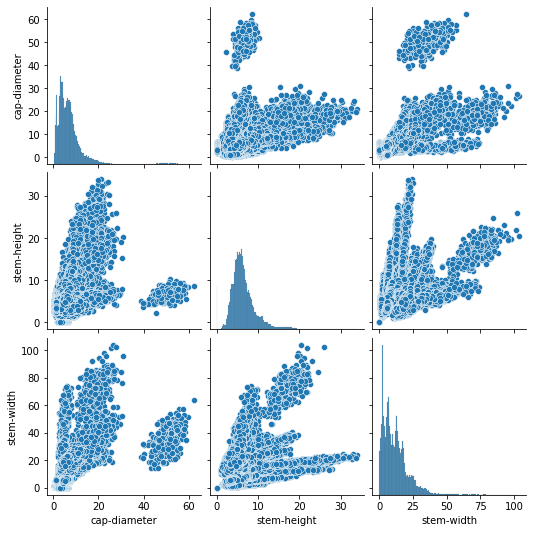

In [ ]:
# plots to understand relationship between different columns and segregation of classes

# As we can see that, there is one histogram in each row, because there x, and y axis have the same values, and 
# histogram is drawn only with respect to one column. But the remaining graphs are scatter plots, as it is drawn 
# with respect to two column values. // same reason as the Ques 2(d)

plt.figure(figsize=(20, 10))
sns.pairplot(dataset[['cap-diameter', 'stem-height', 'stem-width']])
plt.show()

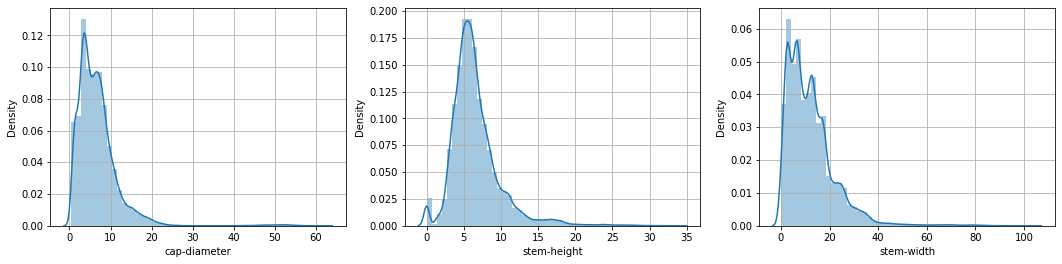

In [ ]:
# let's check the distribution of the data columns having the numeric values.
# In this dataset, we have only three columns which are having numeric values.

# On the x-axis, we have the column values, and on the y-axis, we have the density of each value in the column.

# If we clearly observe the first graph, we can see that how the "cap-diameter" values are distributed among the dataset.
# Like, most of the values in the "cap-diameter" column lies within the range of 3 to 6 approximately.
# In the second graph, most of the values lie between 4 to 7.

plt.figure(figsize=(18, 4))
column_names = ['cap-diameter', 'stem-height', 'stem-width']

for i in range(len(column_names)):
  plt.subplot(1, 3, i+1)
  sns.distplot(dataset[column_names[i]], hist=True)
  plt.grid()

plt.show()

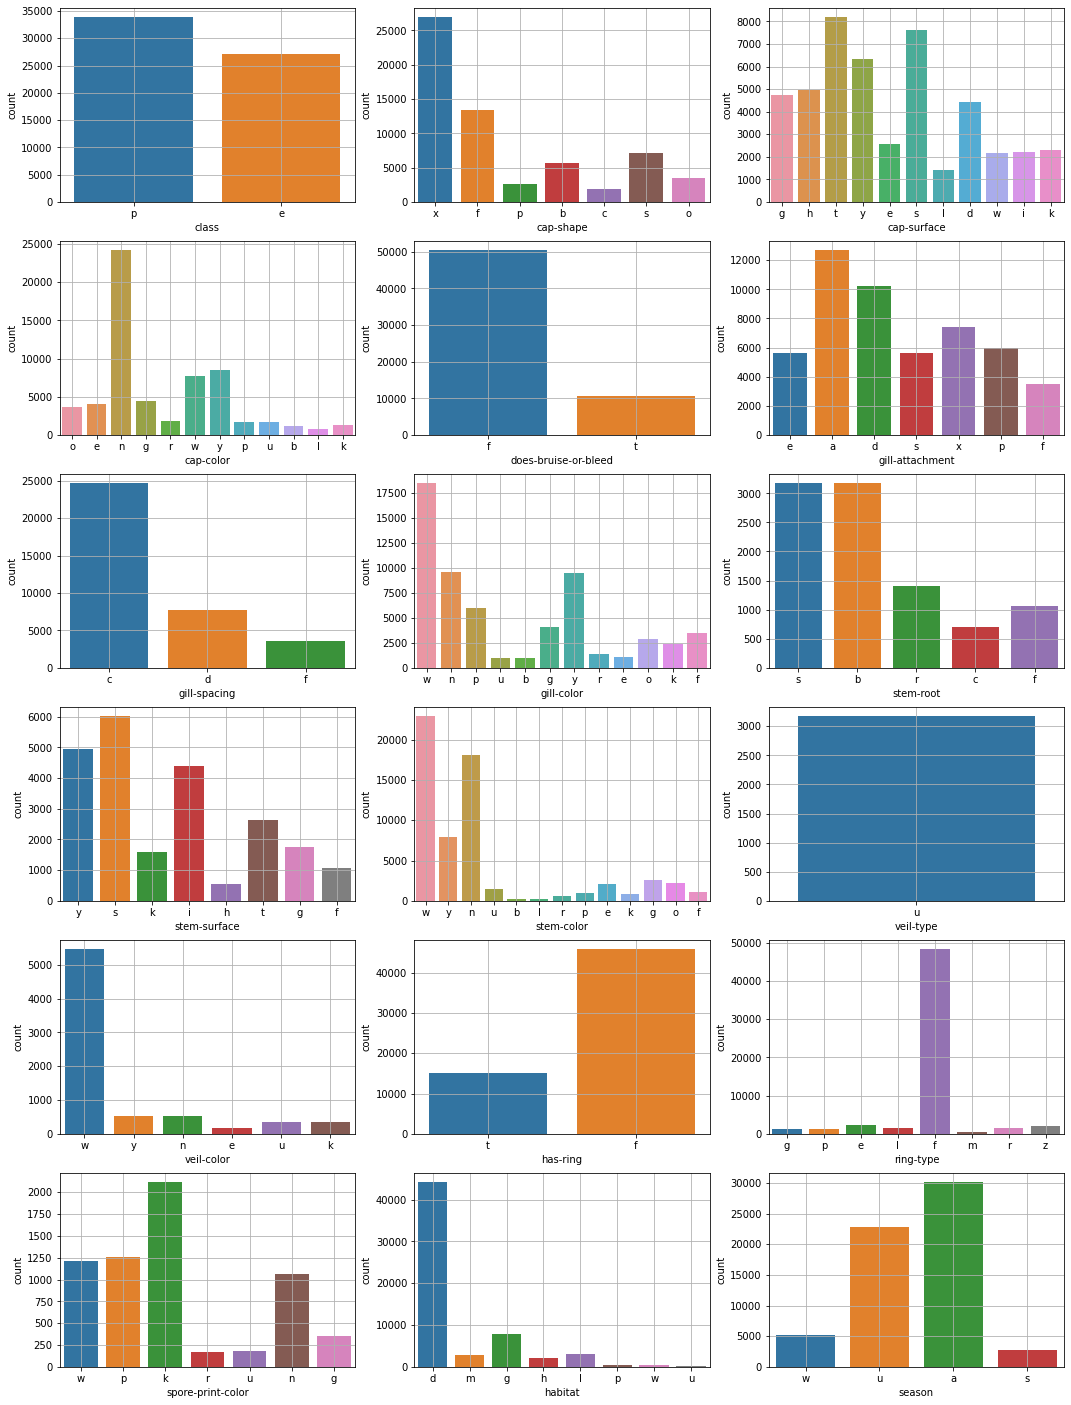

In [ ]:
# Countplot to show the count of each label in each column of "object" type.
plt.figure(figsize=(18, 25))
column_list = list(dataset.columns)

# Removing the columns having no null values and of type float
column_list.remove('cap-diameter')
column_list.remove('stem-height')
column_list.remove('stem-width')

for i in range(len(column_list)):
  plt.subplot(6, 3, i+1)
  sns.countplot(data = dataset, x = column_list[i])
  plt.grid()

plt.show()

# From these plots, we get very important information about each column. After clearly observing the plots
# we can see that each column contains how any unique labels, and the count of it.

# Example: Let's take column "class", this column contains two unique values "p", "e", and their count is approximately
# 34000, and 27000 respectively.

# **Data Preprocessing & Imputing missing values**

In [ ]:
# getting information about the dataset like the data-type of each column,
# count of non-null values in each oolumn.
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

(61069, 21)

In [ ]:
# checking for null values in the dataset
dataset.isnull().sum()

# From this we can see that we have many columns which are having null values, 
# so we have to fill it with some valid values

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [ ]:
# Replacing the missing values of each column using the mode. 

# why mode?? , because this dataset columns have a categorial string values. In this case,
# we cannot find the mean and replace it with null values.
# and for the categorical column, mode is a good option to replace the null values, as it is replaced with category
# having maximum frequency in that column.

column_list = list(dataset.columns)

for i in range(len(column_list)):
  if (dataset[column_list[i]].isnull().values.any()):
    value_dict = dict(dataset[column_list[i]].value_counts())
    if len(value_dict) > 1:
      mode_label = max(value_dict, key=value_dict.get)
      dataset[column_list[i]].fillna(str(mode_label), inplace=True)
    else:
      dataset[column_list[i]].fillna(str(list(value_dict.keys())[0]), inplace=True)

dataset.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [ ]:
# now checking the information about the dataframe, column names, datatype of each column, not null count
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             61069 non-null  object 
 12  stem-surface          61069 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             61069 non-null  object 
 15  veil-color         

# **Correlation**

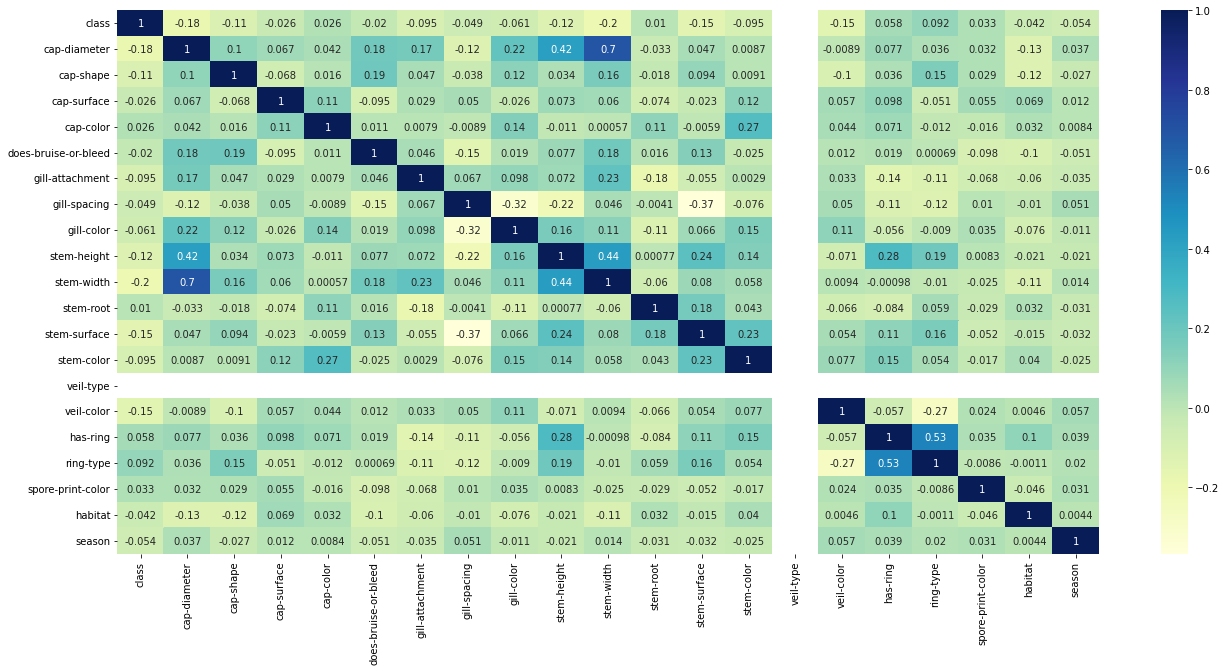

In [ ]:
# Correlation matrix & Heatmap to understand dependence among independent variables

plt.figure(figsize=(22,10))
column_list = list(dataset.columns)

# Removing the columns having no null values and of type float
column_list.remove('cap-diameter')
column_list.remove('stem-height')
column_list.remove('stem-width')

for i in range(len(column_list)):
  dataset[column_list[i]]=dataset[column_list[i]].astype('category').cat.codes

dataset.replace(0, 1)

correlation = dataset.corr()
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

# From the heatmap, we can clearly observe that there is high positive correlation between
# the columns "cap-diameter" and "stem-width".

So from the heatmap and correlation, we can see that the column **"veil-type"** is empty and is having no relation with other columns. So with this conclusion, we can say that our prediction does not depend on the **"veil-type"**, and that is why we can say that **"veil-type"** is the redundant variable.

# **One-Hot Encoding**

In [ ]:
column_list = list(dataset.columns)

# Removing the columns having no null values and of type float
column_list.remove('cap-diameter')
column_list.remove('stem-height')
column_list.remove('stem-width')

encoded_data = pd.get_dummies(dataset, columns = column_list)
encoded_data.head()

,cap-diameter,stem-height,stem-width,class_p,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_s,season_u,season_w
0,15.26,16.95,17.09,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,16.60,17.99,18.19,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,14.07,17.80,17.74,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,14.17,15.77,15.98,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,14.64,16.53,17.20,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
encoded_data.shape

(61069, 121)

We can see that by applying **OneHot** Encoding, the number of columns increases from 21 to 121, because in one hot encoding what it does is, it creates a new column for each label in the original column, and mark it with values 0/1 by mapping to the original dataframe positions.

Alternatively, if we want to intact the number of columns, and want to label each column values with some number, then in that case **LabelEncoder** is also a good option to go with.